In [1]:
from string import ascii_letters
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

sns.set_style("whitegrid")
enem = pd.read_csv("./Content/enem_2018_sample.csv")
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)
### Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [2]:
pessoas_sem_presenca = enem.query("TP_PRESENCA_CN == 0")[["TP_PRESENCA_CN", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT"]]
pessoas_sem_presenca.fillna(0)

,TP_PRESENCA_CN,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00
14,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
137833,0.00,0.00,0.00,0.00,0.00
137837,0.00,0.00,0.00,0.00,0.00
137839,0.00,0.00,0.00,0.00,0.00
137841,0.00,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
### A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

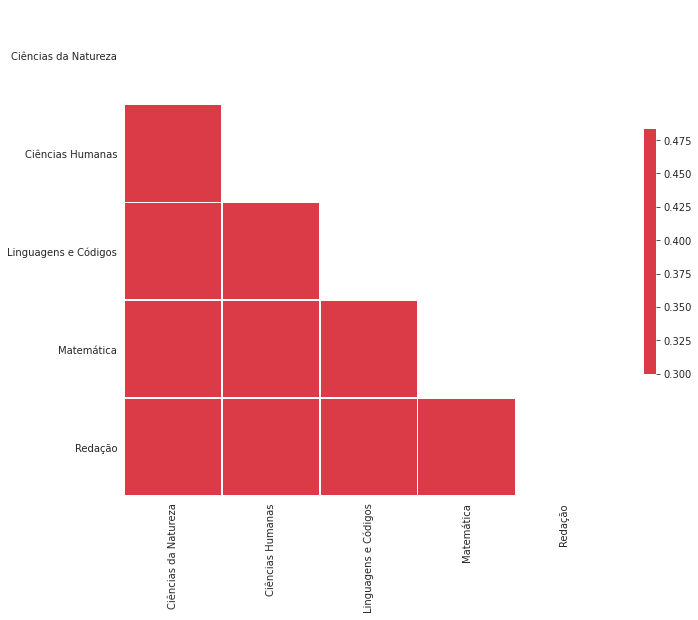

In [3]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_notas = enem[colunas_de_notas].dropna()
enem_notas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
corr = enem_notas.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

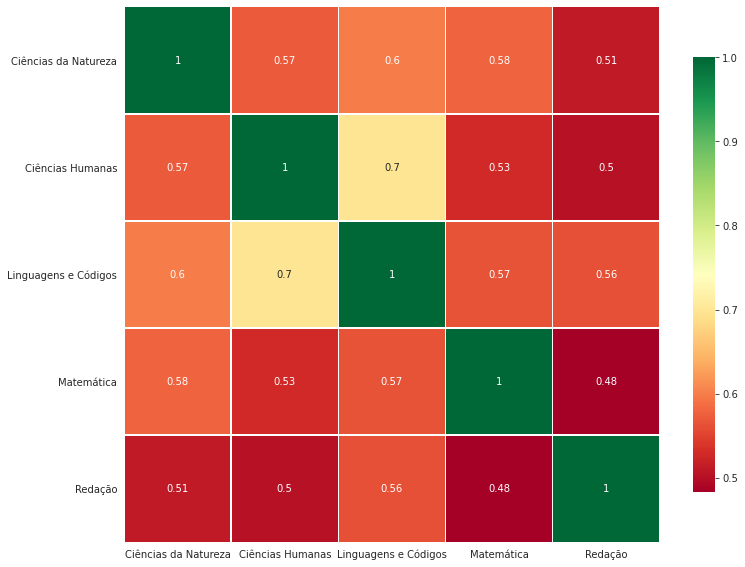

In [4]:
plt.figure(figsize=(12, 16))
sns.heatmap(corr, 
            annot=True, cmap="RdYlGn", 
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}
            )

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)
### Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [5]:
colunas = ["TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TX_GABARITO_CN", "TX_GABARITO_CH","TX_GABARITO_LC", "TX_GABARITO_MT", "NU_NOTA_REDACAO"]

notas_enem = enem[colunas].dropna()
teste = notas_enem[["TX_RESPOSTAS_CN", "TX_GABARITO_CN"]].head(2).values[1]
teste

array(['AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC',
       'BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED'], dtype=object)

In [6]:
np.char.equal(list(teste[0]), list(teste[1])).sum()

8

In [7]:
def calcular_acertos(dados, prova):
    resposta = list(dados.get(f'TX_RESPOSTAS_{prova}'))
    gabarito = list(dados.get(f'TX_GABARITO_{prova}'))
    acertos = np.char.equal(resposta, gabarito)
    acertos = np.count_nonzero(acertos)
    return acertos

In [8]:
numero_de_acertos = notas_enem.copy()

numero_de_acertos['NU_ACERTOS_CN'] = numero_de_acertos.apply(calcular_acertos, prova='CN', axis=1)
numero_de_acertos['NU_ACERTOS_CH'] = numero_de_acertos.apply(calcular_acertos, prova='CH', axis=1)
numero_de_acertos['NU_ACERTOS_LC'] = numero_de_acertos.apply(calcular_acertos, prova='LC', axis=1)
numero_de_acertos['NU_ACERTOS_MT'] = numero_de_acertos.apply(calcular_acertos, prova='MT', axis=1)

In [9]:
numero_de_acertos

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,NU_ACERTOS_CN,NU_ACERTOS_CH,NU_ACERTOS_LC,NU_ACERTOS_MT
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,33,22
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,11,10
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00,11,9,15,8
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00,8,12,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137835,ACBDECBEBBBAEECCAACABDEDCBBDADEDDDBBDDAAAABEE,CEBCAABDACDEBEADCAADBBEBEEECEABADAEBBCBCABDAA,99999BBEDDACCDBCBBCBCBDAECACEEBABACAECECABAADA...,EBAABCDDCEABDCBAEECCEBEBDDACBAEDDCBDAEBAEEBDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,520.00,12,15,15,12
137836,DBCBCABBAEDEAEDCCCBDCEACCDBCACECBCDBABBCCBBBE,EABBCBDEDBBABECACEECBEDADCCADDBCEABDBDADCBBAD,BBDBE99999CDEECDABAADCDEDEBECADCAEAABCDCCBCBEE...,BBCAEBCBCABCADEDABDDBBAABDDADECEBAACDECBDCADA,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,580.00,6,12,14,11
137838,BBCCECBBEDCCCBDBDDDD*EDEDBCDACAAEEEADAEEEEEDD,ECBAEEAEDAEDCBEEEECEADADCDCECDCEAEDCEEBAAEDEC,99999DCECEABDCCCBBAEBBEDABECEABCDAEABAABEECCDB...,DBEACDDDCCCCBBBBBBBEE*C*BBEDDECCAACADCADABADC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,820.00,14,17,16,9
137840,DACDBACDABDBDCACDBCAECECACDECDCDCEBDCCEBDBCAD,BAABCDBBAAEDBAADDBCBCDCBDDEDBCABBCABBCCBBAACB,ACEDC99999EEADCDEBBAEADEBADBBCDCBCCDADDCACACCB...,ACDEDBADBDACACECBBBDECABDADBCAEACABDCEBCEBCBD,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,380.00,7,11,13,13


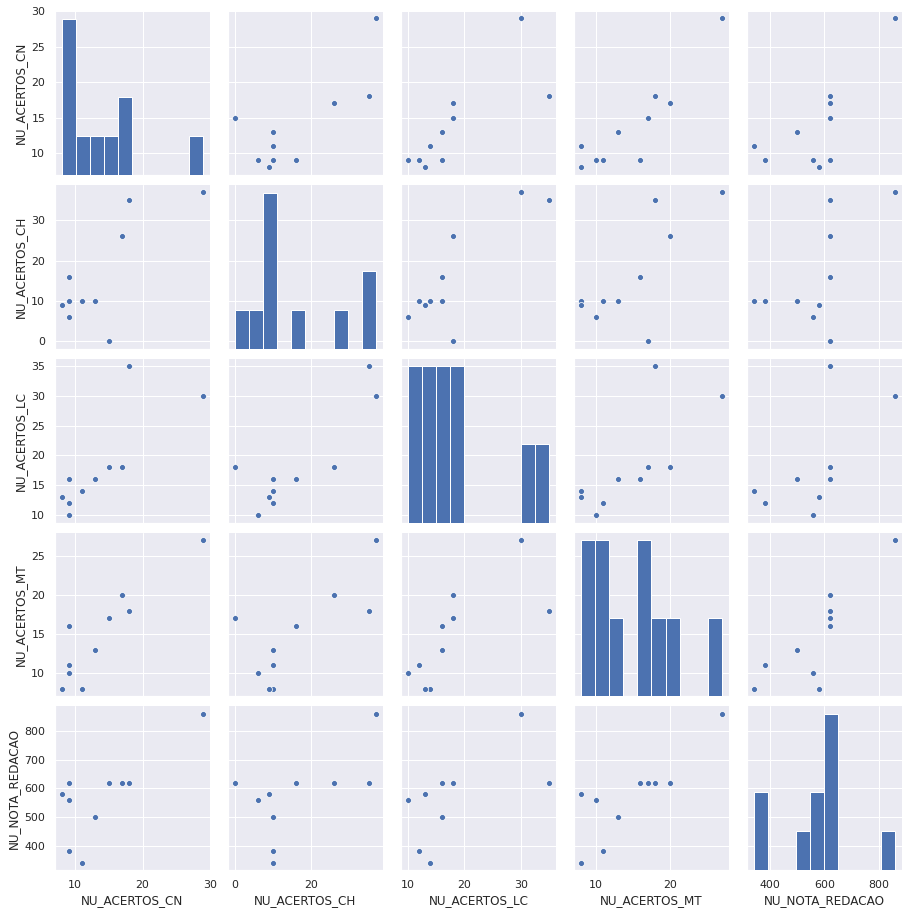

In [10]:
plot_acertos = numero_de_acertos[["NU_ACERTOS_CN", "NU_ACERTOS_CH", "NU_ACERTOS_LC", "NU_ACERTOS_MT", "NU_NOTA_REDACAO"]]

sns.set()
# reduzi para 10 samples por conta do tempo de processamento
sns.pairplot(plot_acertos.sample(10))

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
### Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [11]:
enem_notas.sort_values(by=enem_notas.columns.values.tolist(), ascending=True)

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
71175,0.00,0.00,0.00,0.00,0.00
119585,0.00,441.00,462.90,704.20,380.00
60160,0.00,441.30,466.80,0.00,560.00
28499,0.00,499.10,536.70,0.00,560.00
107725,0.00,534.10,532.60,0.00,340.00
...,...,...,...,...,...
33520,807.10,719.20,644.00,982.50,960.00
96734,831.40,850.40,725.90,943.20,940.00
106298,836.30,735.90,692.70,896.50,840.00
132198,848.10,740.40,702.30,880.70,980.00


In [12]:
notas_sem_0 = enem_notas.replace(0., np.NAN).dropna()

In [13]:
notas_sem_0.sort_values(by=notas_sem_0.columns.values.tolist(), ascending=True)

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
71793,362.50,549.70,504.20,426.00,320.00
28232,362.50,578.60,409.10,370.30,320.00
2857,362.50,593.40,396.90,380.40,340.00
128120,362.50,669.20,477.20,499.00,600.00
93848,362.60,402.00,382.00,420.20,240.00
...,...,...,...,...,...
33520,807.10,719.20,644.00,982.50,960.00
96734,831.40,850.40,725.90,943.20,940.00
106298,836.30,735.90,692.70,896.50,840.00
132198,848.10,740.40,702.30,880.70,980.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
### Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [116]:
def questoes_erradas(dados, prova):
    resposta = list(dados.get(f'TX_RESPOSTAS_{prova}'))
    gabarito = list(dados.get(f'TX_GABARITO_{prova}'))
    questoes_erradas = np.char.equal(resposta, gabarito)
    return pd.Series(~questoes_erradas)

In [117]:
caderno_provas = enem.query('CO_PROVA_LC == 456')
matriz_acertos = caderno_provas.apply(questoes_erradas, prova='LC', axis=1)

In [118]:
matriz_acertos.columns = range(1,len(matriz_acertos.columns)+1)
matriz_acertos.sum(axis=0).sort_values(ascending=False).head()

28    22753
10    22066
19    21901
3     21327
11    20654
dtype: int64